In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [41]:
import numpy as np

In [2]:
df= pd.read_csv("C:\\Users\\suraj\\Downloads\\Churn.csv")

In [3]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [6]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df['Exited'].sum()

2037

In [8]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [9]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [10]:
df2=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [16]:
df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [11]:
df2['Geography_Germany']=df2['Geography_Germany'].astype(int)

In [12]:
df2['Geography_Spain']=df2['Geography_Spain'].astype(int)

In [13]:
df2['Gender_Male']=df2['Gender_Male'].astype(int)

In [14]:
df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [15]:
X=df2.drop(columns=['Exited'])

In [16]:
y=df2['Exited']

In [17]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [18]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
y_train

7389    0
9275    0
2995    0
5316    0
356     0
       ..
9225    0
4859    0
3264    0
9845    0
2732    1
Name: Exited, Length: 8000, dtype: int64

In [22]:
X_train.shape

(8000, 11)

In [23]:
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.fit_transform(X_test)

In [24]:
X_train_trf

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [28]:
!pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/fb/59/3eb58629e3749d9f4fc1e522487af369f9bd4c451f465d3054961fab6bf8/tensorflow-2.13.1-cp38-cp38-win_amd64.whl.metadata
  Using cached tensorflow-2.13.1-cp38-cp38-win_amd64.whl.metadata (2.6 kB)
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/5b/6f/8b125d126d54061c0be610b135aaf2f8960f55c2e185ac32445e4a5012d5/tensorflow-2.13.0-cp38-cp38-win_amd64.whl.metadata
  Using cached tensorflow-2.13.0-cp38-cp38-win_amd64.whl.metadata (2.6 kB)
  Obtaining dependency information for tensorflow-intel==2.13.0 from https://files.pythonhosted.org/packages/38/ba/dd4d998a852451e98dc009ecb208bbb0eeb0c8252dc35b7c4e1050762b36/tensorflow_intel-2.13.0

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.

[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

## Dense Layer Is a Fully Connected Layer where each Neuron Is Connected To Every Other Neuron 

In [46]:
model =Sequential()
model.add(Dense(11,activation='relu',input_dim=11))#Number of perceptron in the first layer =3, 
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [64]:
history=model.fit(X_train_trf,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3023 - accuracy: 0.8759 - val_loss: 0.3454 - val_accuracy: 0.8631
Epoch 2/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3017 - accuracy: 0.8769 - val_loss: 0.3459 - val_accuracy: 0.8631
Epoch 3/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3011 - accuracy: 0.8772 - val_loss: 0.3470 - val_accuracy: 0.8600
Epoch 4/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3022 - accuracy: 0.8767 - val_loss: 0.3452 - val_accuracy: 0.8606
Epoch 5/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3020 - accuracy: 0.8772 - val_loss: 0.3473 - val_accuracy: 0.8650
Epoch 6/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3013 - accuracy: 0.8777 - val_loss: 0.3465 - val_accuracy: 0.8637
Epoch 7/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3020 - accuracy: 0.8767 - val_loss: 0.3452 - val_accuracy: 0.8619

In [50]:
model.layers[0].get_weights()

[array([[ 3.89934033e-01, -2.32033819e-01, -1.94777727e-01,
         -1.79164827e-01,  3.26974332e-01,  6.88672885e-02,
          4.84045930e-02,  1.51005864e-01,  1.45630375e-01,
          1.49248196e-02, -1.94003619e-02],
        [-5.61693847e-01,  5.33990800e-01, -8.00181806e-01,
          1.09975785e-01, -7.94323146e-01, -9.17849317e-02,
          1.84199855e-01,  7.22668707e-01,  2.22133785e-01,
         -4.22236696e-02,  2.79019952e-01],
        [ 8.66073184e-04,  2.71440089e-01,  1.21462598e-01,
          1.83934107e-01,  1.59305513e-01,  5.79243451e-02,
          5.52292652e-02, -1.54257938e-01, -1.81637734e-01,
         -1.02047883e-01,  4.61413234e-01],
        [ 2.61238188e-01, -1.43909067e-01, -2.19816193e-01,
          1.71856824e-02,  1.82817593e-01, -2.06052050e-01,
          5.52921057e-01,  1.33885831e-01, -4.99822974e-01,
          6.97308302e-01, -3.39163631e-01],
        [ 2.70191461e-01,  3.55735749e-01,  9.50354114e-02,
          8.93145025e-01, -1.97322816e-01, -

In [61]:
Y_log=model.predict(X_test_trf)

63/63 [==============================] - 0s 725us/step


In [62]:
y_pred= np.where(Y_log>0.5,1,0)

In [44]:
from sklearn.metrics import accuracy_score


In [63]:
accuracy_score(y_pred,y_test)

0.857

In [65]:
import matplotlib.pyplot as plt

In [66]:
history.history

{'loss': [0.30230632424354553,
  0.30169352889060974,
  0.30112224817276,
  0.3021589517593384,
  0.3019789457321167,
  0.30130836367607117,
  0.30198919773101807,
  0.3012138903141022,
  0.30233055353164673,
  0.30252888798713684,
  0.3019954562187195,
  0.30142340064048767,
  0.3018450438976288,
  0.30177220702171326,
  0.3016015291213989,
  0.3014044761657715,
  0.30156630277633667,
  0.30120527744293213,
  0.30183660984039307,
  0.3013180196285248,
  0.3016875982284546,
  0.30107536911964417,
  0.30181601643562317,
  0.30145734548568726,
  0.30165499448776245,
  0.3007454574108124,
  0.30101481080055237,
  0.3009198307991028,
  0.30138301849365234,
  0.3009427785873413,
  0.3010120093822479,
  0.30084869265556335,
  0.30176299810409546,
  0.30070891976356506,
  0.30068594217300415,
  0.30041205883026123,
  0.300833135843277,
  0.3006381392478943,
  0.30047836899757385,
  0.2999035716056824,
  0.30065053701400757,
  0.301033616065979,
  0.30007851123809814,
  0.3003022372722626,
  0

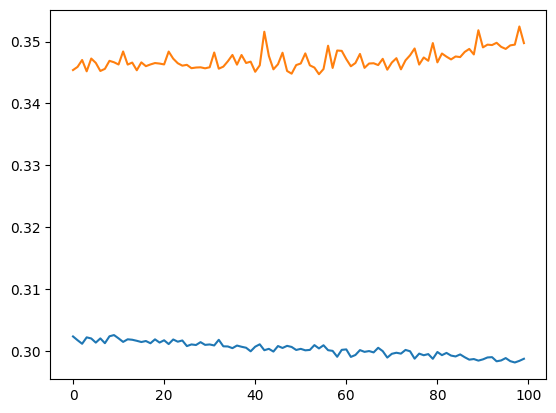

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

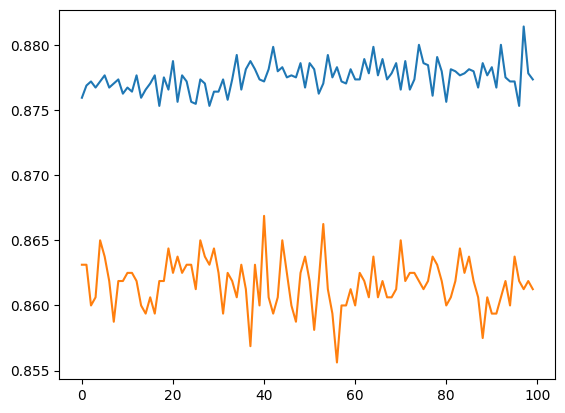

In [71]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])